In [54]:
import random
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import sys
print(sys.maxsize)
print(-sys.maxsize)

9223372036854775807
-9223372036854775807


In [55]:
hurufA = [[76,80], [75,79], [75,79], [75,79], [0,50], [66,70], [-1000,-7], [-2,1], [-3,6]]
hurufB = [[62,66], [63,67], [61,65], [63,67], [0,90], [68,73], [-1000,-7], [-2,1], [-2,6]]
hurufC = [[66,70], [66,70], [66,70], [66,70], [90,90], [66,70], [-1000,-7], [-1000,-2], [-4,5]]
hurufD = [[73,76], [73,76], [72,76], [63,66], [90,90], [69,73], [-1000,-7], [-2,1], [-5,5]]
hurufE = [[73,78], [73,78], [73,78], [73,78], [90,90], [70,74], [-1000,-7], [-2,1], [-1,6]]
hurufF = [[64,68], [64,68], [62,66], [72,76], [90,90], [68,72], [-1000,-7], [-2,2], [-4,3]]
hurufG = [[76,80], [75,79], [74,78], [65,69], [90,90], [65,69], [-1000,-7], [-1000,-2], [-1,4]]
hurufH = [[76,80], [74,78], [61,65], [62,66], [0,90], [68,72], [-4,3], [-1000,-7], [-4,0]]
hurufI = [[61,65], [74,78], [74,78], [74,78], [0,90], [69,73], [-1000,-7], [-2,1], [-3,6]]
hurufJ = [[61,65], [74,78], [74,78], [74,78], [0,90], [69,73], [-1000,-5], [-1000,-5], [-4,2]]
hurufK = [[74,78], [73,77], [65,69], [63,67], [90,90], [66,70], [-1000,-7], [-1000,-4], [-2,3]]
hurufL = [[74,78], [74,78], [74,78], [63,67], [90,90], [63,67], [-1000,-7], [-2,1], [-3,6]]
hurufM = [[72,76], [71,75], [71,75], [71,75], [0,90], [69,73], [-1000,-7], [-2,1], [-3,6]]
hurufN = [[72,76], [71,75], [71,75], [71,75], [90,90], [69,73], [-1000,-7], [-2,1], [-3,6]]
hurufO = [[72,76], [72,76], [72,76], [72,76], [90,90], [70,74], [-1000,-7], [-1000,-2], [-1,6]]
hurufP = [[74,78], [73,77], [65,69], [63,67], [90,90], [66,70], [2,1000], [-1000,-2], [6,1000]]
hurufQ = [[76,80], [75,79], [74,78], [65,69], [90,90], [65,69], [0,4], [-3,0], [7,1000]]
hurufR = [[74,78], [74,78], [67,71], [61,65], [90,90], [69,73], [-1000,-7], [-2,1], [-3,6]]
hurufS = [[76,80], [75,79], [75,79], [75,79], [0,50], [72,76], [-1000,-7], [-2,1], [-3,6]]
hurufT = [[76,80], [75,79], [75,79], [72,76], [90,90], [66,70], [-1000,-7], [-1000,-2], [-1,6]]
hurufU = [[76,80], [74,78], [61,65], [62,66], [0,90], [68,72], [-1000,-7], [-4,1], [-3,6]]
hurufV = [[76,80], [74,78], [61,65], [62,66], [90,90], [68,72], [-1000,-7], [-4,1], [-3,6]]
hurufW = [[76,80], [64,68], [62,66], [62,66], [90,90], [68,72], [-1000,-7], [-2,1], [-3,6]]
hurufX = [[76,80], [75,79], [75,79], [72,73], [90,90], [72,76], [-1000,-7], [-1000,-2], [-1,6]]
hurufY = [[62,66], [73,77], [73,77], [74,78], [0,90], [64,68], [-1000,-6], [-3,1], [-3,7]]
hurufZ = [[76,80], [75,79], [75,79], [63,67], [90,90], [69,73], [-1,4], [-5,1], [7,1000]]

label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [56]:
def data_generator(low:float, high:float, label:str):
    features = []
    cls = []
    for i in range(100):
        r = random.uniform(low,high)
        features.append(float('%.3f' % r))
        cls.append(label)
    return features,cls

def frame_generator(value:list, l:str):
    empty_frame = pd.DataFrame()
    for i in range(len(value)):
        data,label = data_generator(value[i][0], value[i][1], l)
        df = pd.DataFrame(data, columns=[f"feature_{i}"])
        frame = pd.concat([empty_frame, df], axis=1)
        empty_frame = frame
        # print(data)
    cls = pd.DataFrame(label, columns=["label"])
    frame = pd.concat([frame, cls], axis=1)
    return frame

def main(l:list, *args):
    count = 0
    empty_frame = pd.DataFrame()
    for i in args:
        frame = frame_generator(i, l[count])
        count += 1
        df = pd.concat([empty_frame,frame])
        empty_frame = df
    df.reset_index(drop=True, inplace=True)
    return df

In [57]:
# df = main(label, hurufA, hurufB, hurufC, hurufD, hurufE, hurufF, hurufG, hurufH, hurufI, hurufJ, hurufK, hurufL, hurufM, hurufN, hurufO, hurufP, hurufQ, hurufR, hurufS, hurufT, hurufU, hurufV, hurufW, hurufX, hurufY, hurufZ)
df = main(label,hurufA, hurufB, hurufC, hurufD, hurufE)
df.to_csv('data_5Class.csv', index=False)

In [70]:
df = pd.read_csv('data3.csv')
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,73.912792,74.295638,71.582529,69.559919,72.531301,69.821451,-413.622133,-173.189104,61.938021
std,5.438108,3.839945,5.503634,5.212472,28.079831,2.468620,361.834893,292.972203,195.052983
min,61.016000,63.029000,61.000000,61.002000,0.097000,63.037000,-999.999000,-999.620000,-4.865000
25%,72.788750,73.620500,65.971750,64.791000,55.227750,68.225000,-721.493500,-264.311250,-0.519000
50%,76.064500,75.408500,74.004000,67.881500,90.000000,69.885500,-413.513500,-1.555500,1.797000
75%,77.719250,76.800000,76.163750,74.583250,90.000000,71.594500,-124.810000,-0.234750,4.306750
max,79.995000,78.985000,78.998000,78.960000,90.000000,75.996000,988.544000,1.964000,996.958000


In [59]:
df['label'].unique()

array(['A', 'B'], dtype=object)

In [12]:
df.isnull().values.any()

False

In [71]:
df['label'] = df['label'].map({'A' :0, 'B' :1, 'C' :2, 'D' :3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}).astype(int) #mapping numbersdf.head()

In [136]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,label
0,77.654,76.074,76.600,77.308,45.893,69.503,-409.508,-1.631,5.517,A
1,77.264,76.127,78.276,76.091,23.208,67.144,-697.878,0.913,5.480,A
2,76.044,78.863,76.363,78.880,49.441,66.786,-313.861,-0.061,2.347,A
3,79.607,75.289,78.099,75.287,22.052,66.035,-944.338,0.693,-2.184,A
4,77.330,75.976,76.674,76.122,17.508,69.871,-427.840,-0.518,0.951,A
...,...,...,...,...,...,...,...,...,...,...
195,62.214,64.868,64.811,65.224,85.564,72.896,-364.665,-1.078,4.463,B
196,64.968,65.346,61.022,65.877,62.974,68.408,-501.332,-0.892,5.286,B
197,65.183,64.582,64.850,63.108,0.128,70.798,-95.944,0.790,1.295,B
198,65.695,66.911,63.718,66.132,29.480,69.112,-601.594,-1.501,-1.719,B


<AxesSubplot: title={'center': 'feature_0'}, xlabel='label'>

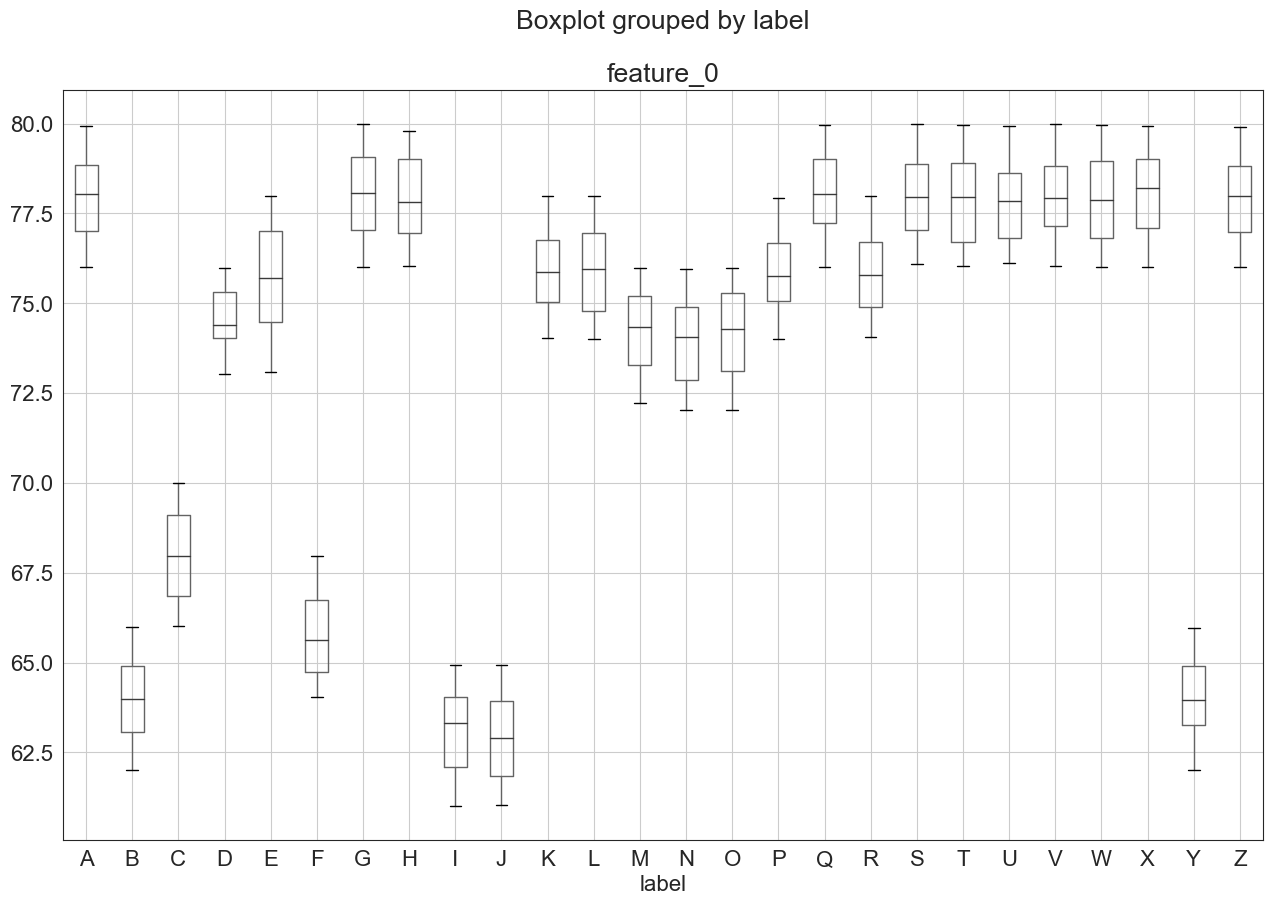

In [134]:
df.boxplot(by ='label', column =['feature_0'], figsize = (15,10))

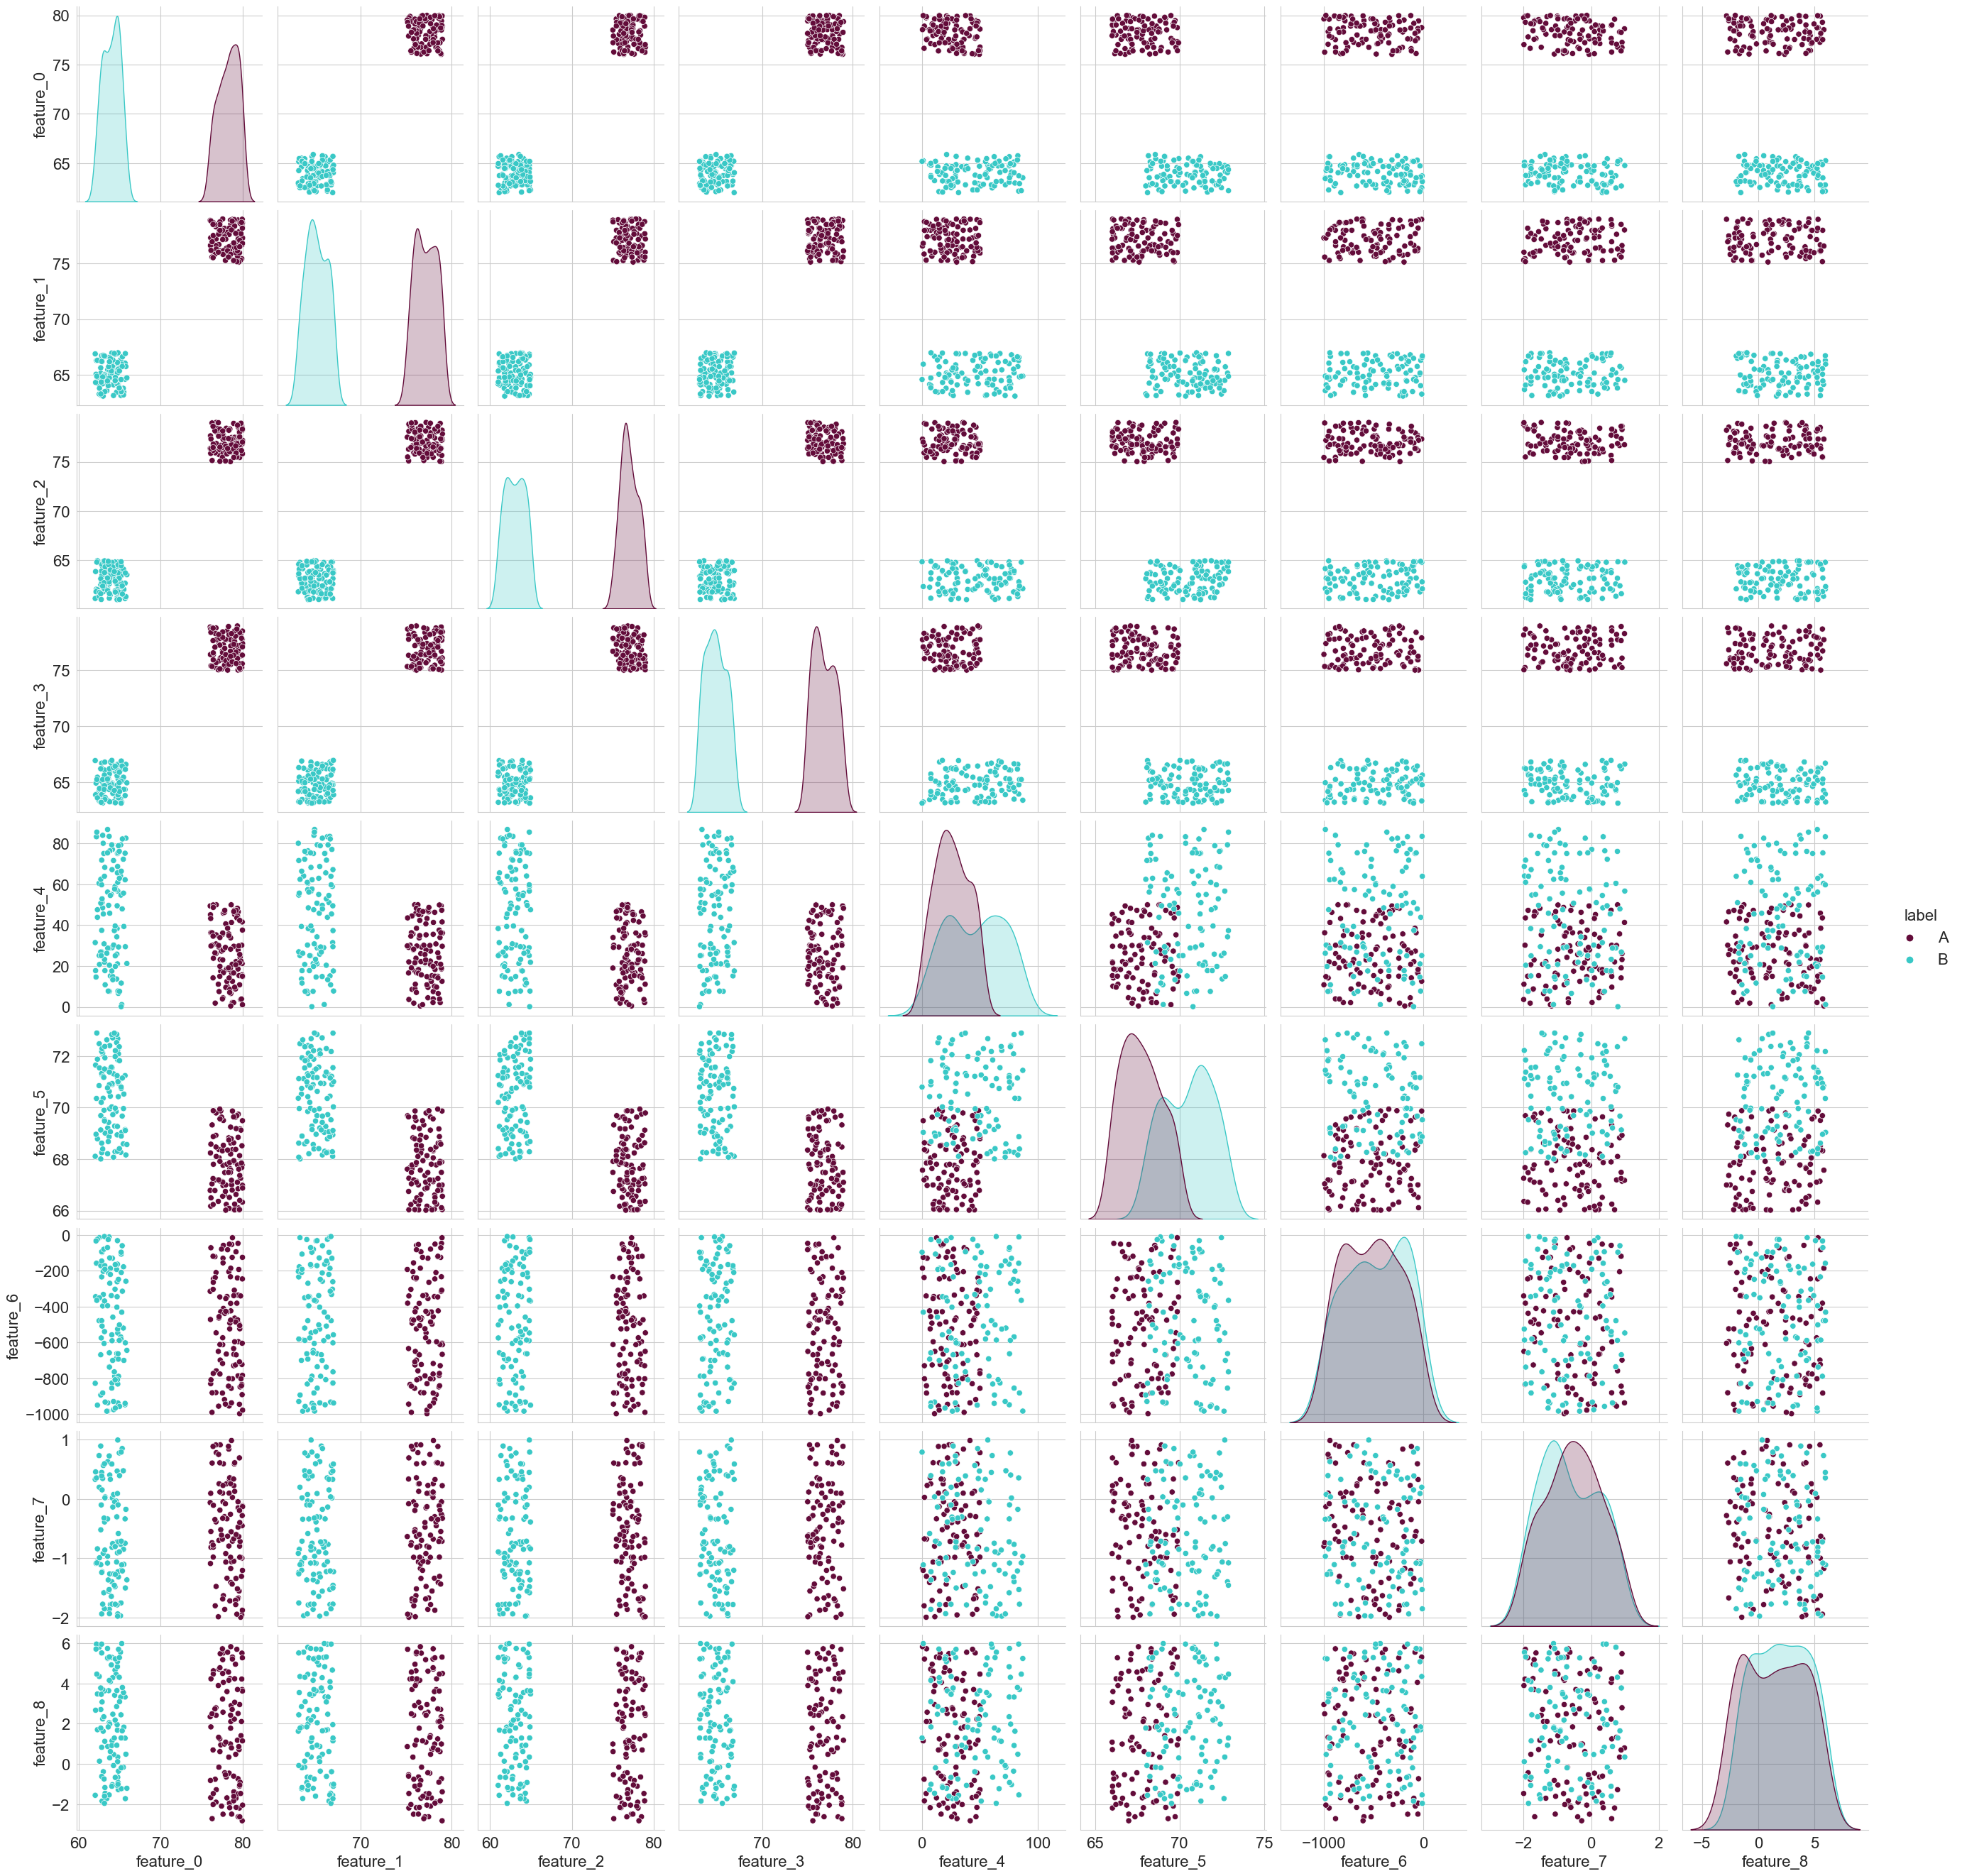

In [140]:
plt.close()
sns.set_style("whitegrid")
sns.color_palette("hls", 8)
sns.pairplot(df, hue="label", height=3)
plt.show()

In [61]:
df_feature = df.drop(["label"],axis=1)
cluster = df["label"]
df_feature

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,77.654,76.074,76.600,77.308,45.893,69.503,-409.508,-1.631,5.517
1,77.264,76.127,78.276,76.091,23.208,67.144,-697.878,0.913,5.480
2,76.044,78.863,76.363,78.880,49.441,66.786,-313.861,-0.061,2.347
3,79.607,75.289,78.099,75.287,22.052,66.035,-944.338,0.693,-2.184
4,77.330,75.976,76.674,76.122,17.508,69.871,-427.840,-0.518,0.951
...,...,...,...,...,...,...,...,...,...
195,62.214,64.868,64.811,65.224,85.564,72.896,-364.665,-1.078,4.463
196,64.968,65.346,61.022,65.877,62.974,68.408,-501.332,-0.892,5.286
197,65.183,64.582,64.850,63.108,0.128,70.798,-95.944,0.790,1.295
198,65.695,66.911,63.718,66.132,29.480,69.112,-601.594,-1.501,-1.719


In [62]:
pca = PCA(min(300, 9))
pca.fit(df_feature)
df_feature

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,77.654,76.074,76.600,77.308,45.893,69.503,-409.508,-1.631,5.517
1,77.264,76.127,78.276,76.091,23.208,67.144,-697.878,0.913,5.480
2,76.044,78.863,76.363,78.880,49.441,66.786,-313.861,-0.061,2.347
3,79.607,75.289,78.099,75.287,22.052,66.035,-944.338,0.693,-2.184
4,77.330,75.976,76.674,76.122,17.508,69.871,-427.840,-0.518,0.951
...,...,...,...,...,...,...,...,...,...
195,62.214,64.868,64.811,65.224,85.564,72.896,-364.665,-1.078,4.463
196,64.968,65.346,61.022,65.877,62.974,68.408,-501.332,-0.892,5.286
197,65.183,64.582,64.850,63.108,0.128,70.798,-95.944,0.790,1.295
198,65.695,66.911,63.718,66.132,29.480,69.112,-601.594,-1.501,-1.719


In [63]:
columns = ['pca_%i' % i for i in range(3)]
df_pca = pd.DataFrame(pca.transform(df_feature), columns=columns)
df_pca['cluster'] = cluster
df_pca

ValueError: Shape of passed values is (200, 9), indices imply (200, 3)

In [64]:
columns = ['pca_%i' % i for i in range(9)]
df_pca = pd.DataFrame(pca.transform(df_feature), columns=columns)
df_pca['cluster'] = cluster
df_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,cluster
0,-85.805246,5.072051,-14.877301,4.303403,-1.302328,0.708076,0.959760,0.533938,-0.671233,0
1,202.644783,-15.175152,-7.187332,3.908521,-0.112748,-1.193899,-1.576154,1.057711,1.316563,0
2,-181.462072,7.554725,-17.551056,1.096041,2.217000,2.114378,-1.300157,0.856157,-0.098309,0
3,449.107796,-15.378285,-7.046460,-3.913094,-0.124712,-2.959419,-0.126101,0.530752,1.326297,0
4,-67.373445,-21.409430,-4.852127,-0.428363,-1.916266,0.775018,0.185249,0.172639,0.045718,0
...,...,...,...,...,...,...,...,...,...,...
195,-130.876869,50.757229,-4.006883,2.787357,-2.558530,1.059013,-1.414497,0.969696,-0.604006,1
196,5.872797,29.915264,3.304706,3.134808,2.864214,-0.388344,1.635194,-0.335902,0.221895,1
197,-399.280937,-31.354868,22.979357,-0.947704,-1.636201,-1.732308,-0.658770,-0.582010,1.545403,1
198,106.261926,-2.130514,11.961383,-3.837591,1.259140,-0.046793,0.357255,-0.372470,-1.110630,1


In [116]:
groups = {}
for i in range(0, 3):
    groups[i] = i

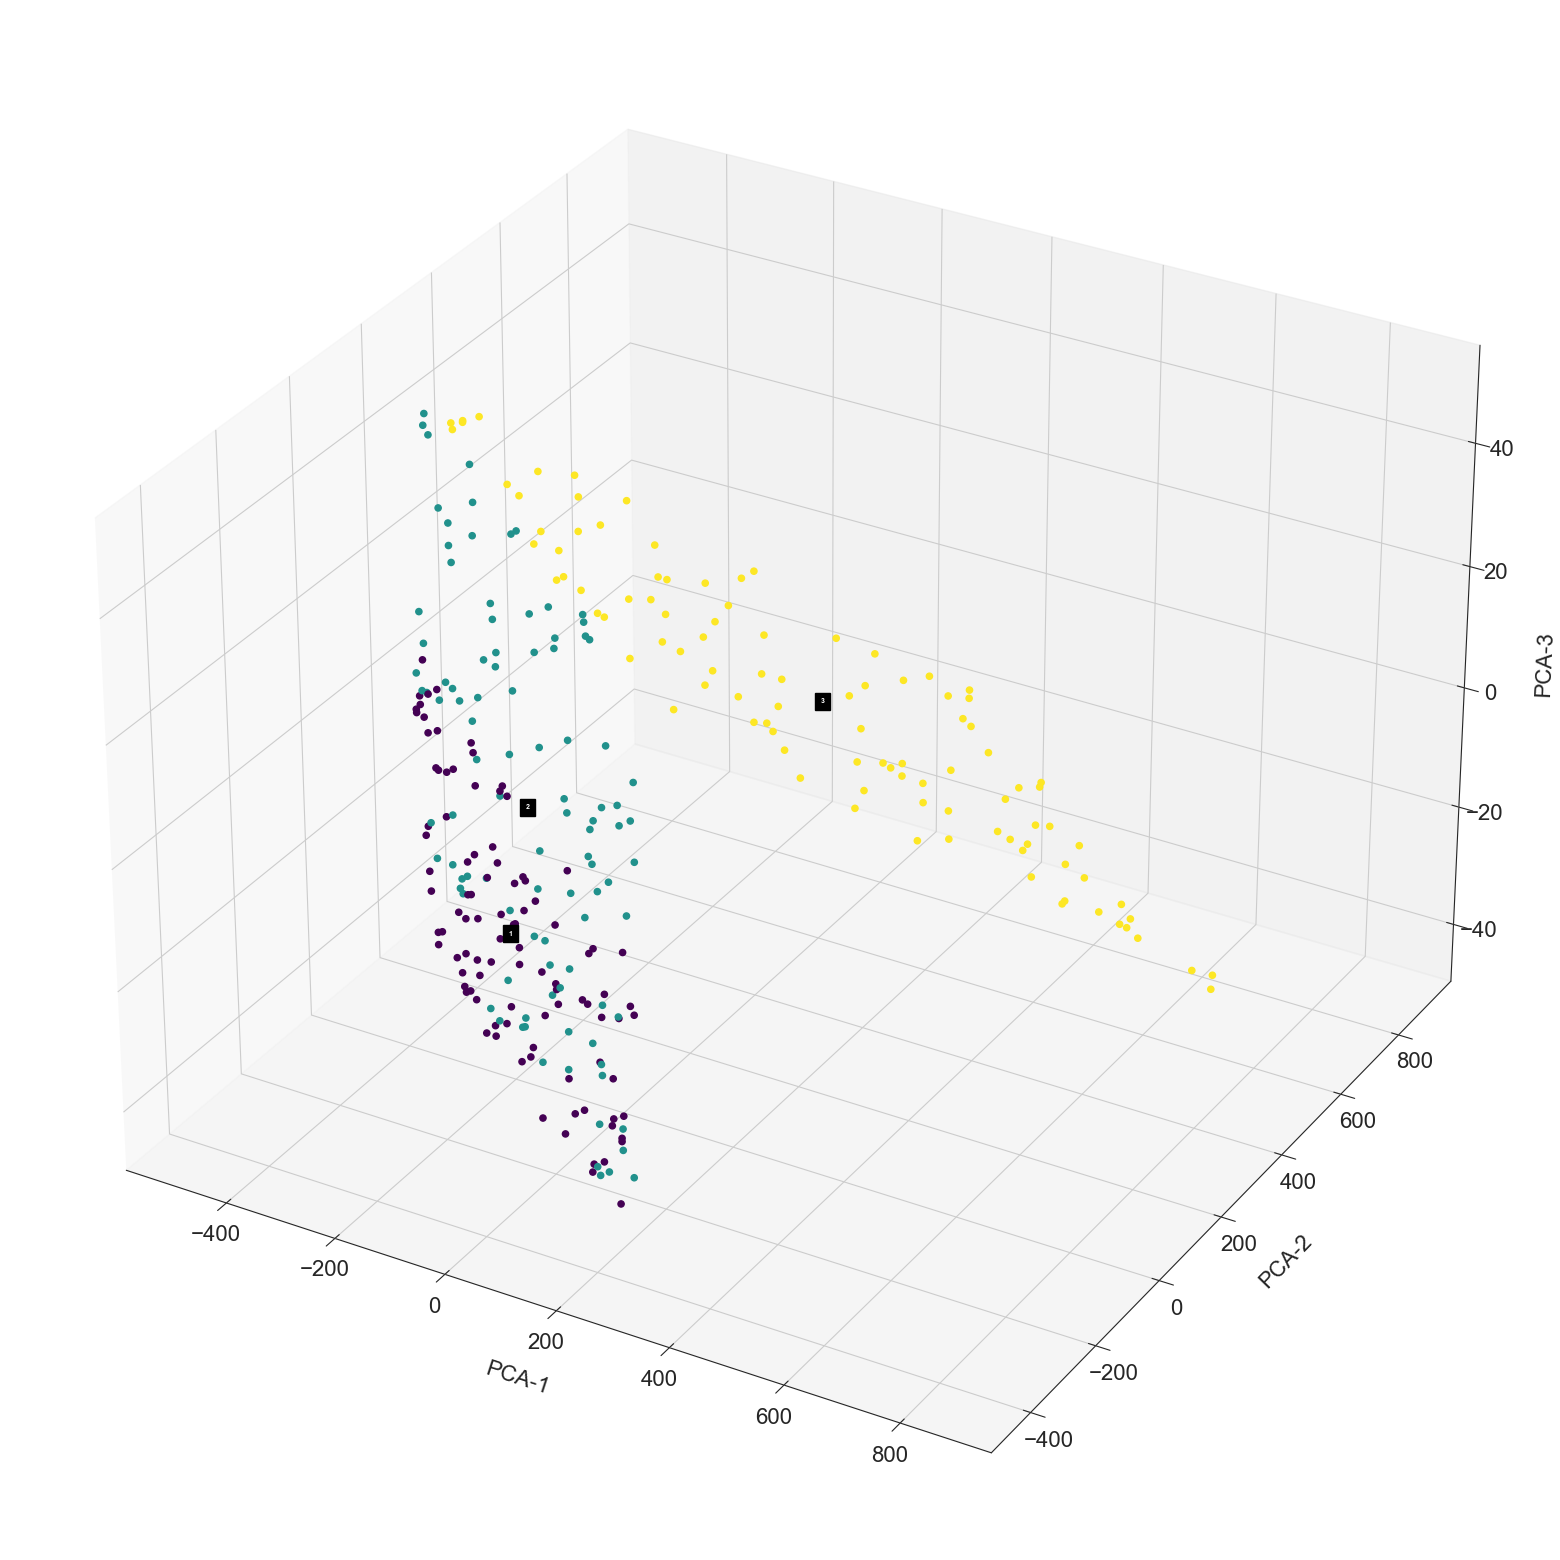

In [117]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

x = df_pca['pca_0']
y = df_pca['pca_1']
z = df_pca['pca_2']

ax.scatter(x, y, z, c=df_pca['cluster'], marker='o', cmap="viridis", alpha=1.0)


for i, label in enumerate(groups.keys()):
    cx = df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1','pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8']].mean()[0]
    cy = df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1','pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8']].mean()[1]
    cz = df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1','pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8']].mean()[2]
    ax.text(cx,cy,cz,  '%s' % (str(label+1)), size=5, horizontalalignment='center',
             verticalalignment='center', weight='bold', color='white', backgroundcolor='#000000')


ax.set_xlabel('\n\nPCA-1')
ax.set_ylabel('\n\nPCA-2')
ax.set_zlabel('\n\nPCA-3')
plt.savefig('PCA.png')
plt.show()

C:\Users\satri\AppData\Local\Temp\ipykernel_21616\4106863677.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt= '.2f')


<AxesSubplot: >

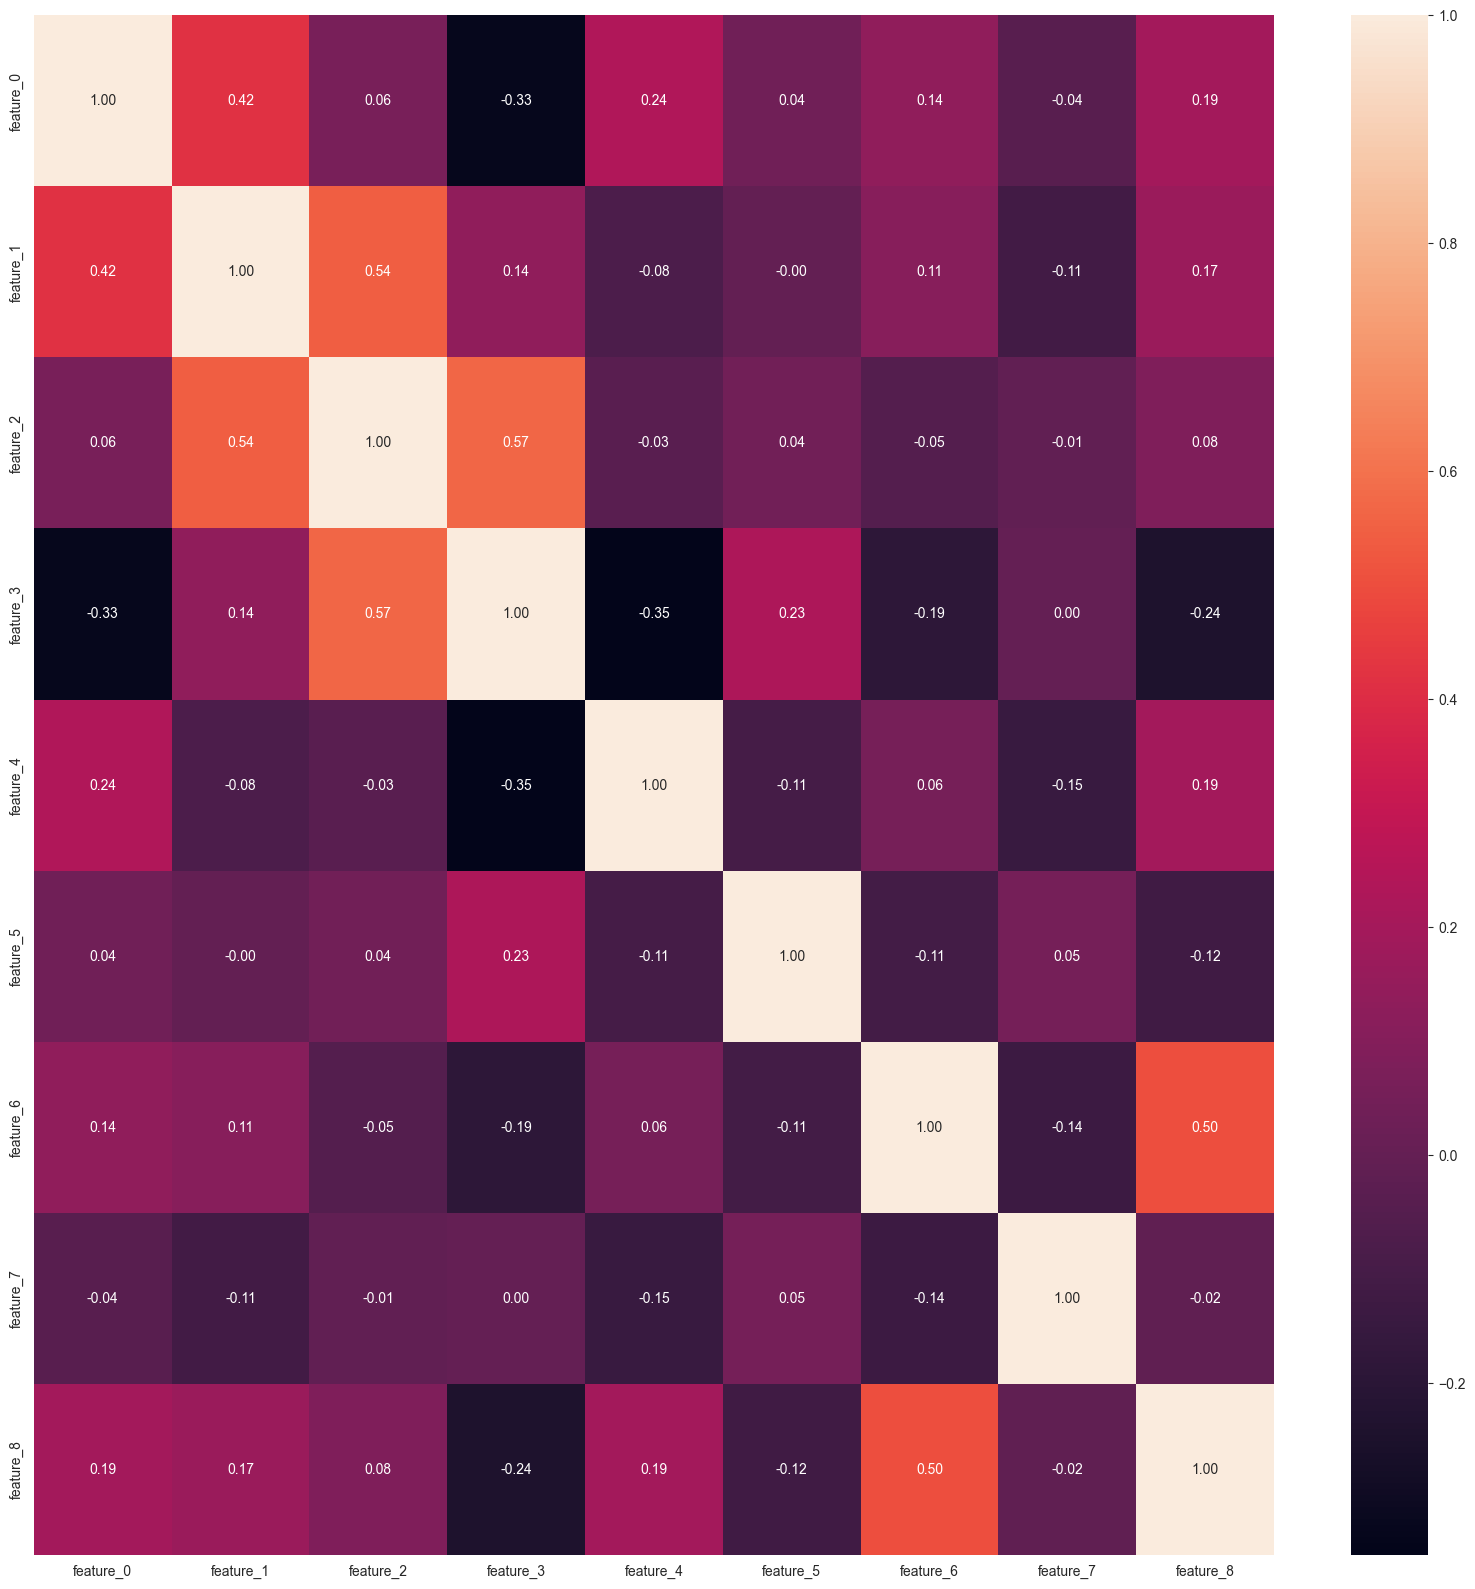

In [7]:
import seaborn as sns
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

In [72]:
col = []
for i in range(9):
    col.append(f'feature_{i}')
col

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8']

In [73]:
x_data = df.drop(["label"],axis=1)
y_data = df["label"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=col)
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,0.918120,0.872274,0.910490,0.899543,0.489594,0.391002,0.130561,0.997152,0.010491
1,0.849096,0.951930,0.966385,0.939247,0.468583,0.467629,0.358173,0.996425,0.008578
2,0.962221,0.837992,0.857762,0.782158,0.103489,0.280732,0.043696,0.998639,0.003762
3,0.827230,0.972111,0.852317,0.921372,0.551305,0.441161,0.313676,0.998308,0.009048
4,0.955846,0.932627,0.805089,0.904054,0.247355,0.413149,0.333050,0.997316,0.007343


In [74]:
import pickle

X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 123)
KNN=KNeighborsClassifier()
KNN.fit(X_train, y_train)

filename = 'KNN_model.sav'
pickle.dump(KNN, open(filename, 'wb'))

In [75]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
72,0.880499,0.776197,0.855873,0.922653,0.531762,0.421560,0.391265,0.998427,0.006776
1068,0.794352,0.842504,0.379987,0.112652,1.000000,0.323327,0.423307,0.608535,0.003015
2150,0.879024,0.876347,0.177520,0.237666,1.000000,0.471255,0.173280,0.996422,0.007585
112,0.054534,0.041489,0.119458,0.248691,0.367641,0.554055,0.030200,0.998372,0.003652
2202,0.850150,0.083605,0.272864,0.107918,1.000000,0.430512,0.440460,0.997861,0.003959
...,...,...,...,...,...,...,...,...,...
1147,0.879551,0.740411,0.875264,0.324758,1.000000,0.249016,0.345997,0.996239,0.006236
2154,0.895569,0.763412,0.174742,0.277481,1.000000,0.494483,0.396679,0.996619,0.009015
1766,0.708941,0.932439,0.543449,0.043769,1.000000,0.462999,0.388355,0.996855,0.010114
1122,0.697455,0.894961,0.873041,0.306493,1.000000,0.139285,0.464611,0.998465,0.009443


In [78]:
y_pred=KNN.predict_proba(X_test)

In [77]:
result = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [138]:
X_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
2483,0.153117,0.660253,0.716246,0.899098,0.656196,0.215989,0.486626,0.999009,0.007387
2319,0.831709,0.942028,0.844649,0.649404,1.000000,0.744502,0.043085,0.634499,0.010130
632,0.816903,0.810604,0.868319,0.306326,1.000000,0.442472,0.238379,0.386600,0.008470
2267,0.997366,0.084796,0.240027,0.232431,1.000000,0.555521,0.271591,0.996655,0.006001
1457,0.748037,0.747368,0.666241,0.834558,1.000000,0.565167,0.377741,0.748185,0.005856
...,...,...,...,...,...,...,...,...,...
1364,0.675905,0.702870,0.728803,0.559639,1.000000,0.608920,0.178299,0.998588,0.005298
563,0.187839,0.149599,0.163740,0.714668,1.000000,0.428814,0.456060,0.999454,0.004718
807,0.032035,0.786475,0.747972,0.930170,0.183909,0.566093,0.351585,0.997555,0.002630
1540,0.731493,0.829719,0.377375,0.303486,1.000000,0.409291,0.930735,0.151684,0.935622


In [139]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        19
           4       0.94      1.00      0.97        16
           5       1.00      1.00      1.00        21
           6       1.00      0.96      0.98        24
           7       1.00      0.95      0.98        21
           8       0.82      1.00      0.90        18
           9       1.00      0.86      0.92        21
          10       0.96      1.00      0.98        25
          11       0.94      1.00      0.97        17
          12       1.00      0.88      0.94        26
          13       0.71      1.00      0.83        12
          14       0.96      0.88      0.92        25
          15       1.00      1.00      1.00        19
          16       0.96      1.00      0.98        24
          17       1.00    

In [140]:
accuracy

0.9615384615384616

In [73]:
import random

testing = []
hurufE = [[73,78], [73,78], [73,78], [73,78], [90,90], [70,74], [-1000,-7], [-2,1], [-1,6]]
hurufB = [[62,66], [63,67], [61,65], [63,67], [0,90], [68,73], [-1000,-7], [-2,1], [-2,6]]
hurufP = [[74,78], [73,77], [65,69], [63,67], [90,90], [66,70], [2,1000], [-1000,-2], [6,1000]]

for i in hurufP:
    r = random.uniform(i[0], i[1])
    testing.append(r)

In [74]:
testing

[75.0340023069742,
 73.49542270041614,
 68.57251599619728,
 66.14204087602961,
 90.0,
 66.35474090189643,
 608.9907758955313,
 -289.00953503004564,
 384.8583248734149]

In [2]:
from script import main

In [3]:
test = main.create_data(testing)

In [5]:
hasil = main.load_model(test)

In [6]:
hasil

array([4])

In [7]:
min = [61.016000, 63.029000, 61.000000, 61.002000, 0.097000, 63.037000, -999.999000, -999.620000, -4.865000]
max = [79.995000, 78.985000, 78.998000, 78.960000, 90.000000, 75.996000, 988.544000, 1.964000, 996.958000]
val = testing

In [142]:
# for i in range(len(testing)):
#     testing[i] = int(testing[i])
testing

[76.92725485237332,
 73.98606142838284,
 74.37443808458498,
 74.33639781948395,
 90.0,
 73.42291573591673,
 -746.3278489967538,
 0.9356398013911837,
 2.0214613947317233]

In [9]:
import pandas as pd
col = []
for i in range(9):
    col.append(f'feature_{i}')

frame = pd.DataFrame(data = [min, val, max], columns = col)
frame

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,61.016000,63.029000,61.000000,61.002000,0.097,63.037000,-999.999000,-999.620000,-4.865000
1,76.552687,77.952441,75.049193,74.793639,90.000,70.047677,-880.661926,0.179933,2.459498
2,79.995000,78.985000,78.998000,78.960000,90.000,75.996000,988.544000,1.964000,996.958000


In [11]:
from sklearn import preprocessing
MinMaxScaler = preprocessing.MinMaxScaler()
test_normalized = MinMaxScaler.fit_transform(frame)
data = pd.DataFrame(test_normalized,columns=col)

In [12]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.818625,0.935287,0.780597,0.767994,1.0,0.540989,0.060012,0.998219,0.007311
2,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [149]:
# import pandas as pd
# data = pd.DataFrame(testing)
# data = data.transpose()
# data.columns = col
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.838361,0.686705,0.743107,0.742532,1.0,0.801444,0.127566,0.998973,0.006874
2,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [13]:
data = data.iloc[1].to_frame().transpose()

In [14]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
1,0.818625,0.935287,0.780597,0.767994,1.0,0.540989,0.060012,0.998219,0.007311


In [152]:
import pickle
loaded_model = pickle.load(open('KNN_model.sav', 'rb'))

result = loaded_model.predict(data)

In [153]:
result

array([4])

In [66]:
result

array([24, 23,  6, 22, 14, 12,  1, 13, 12, 19,  0, 13, 23, 16, 20,  0, 10,
       20,  3,  2, 20, 12, 21, 12, 12, 20, 25,  3, 23,  1, 21,  9,  2, 11,
       17, 12,  5, 19, 25, 18, 21, 11, 16,  3, 24, 14, 24, 11, 23, 16, 13,
       17, 21, 10,  2,  8,  2, 18, 20, 10, 12, 10, 14, 19, 17,  3, 21,  2,
       18,  3, 24,  0,  2, 25, 18, 11, 19,  5, 11,  9,  5, 16,  2, 15,  3,
        6, 18, 12, 23,  5, 22,  2,  5,  7,  4, 23,  3, 20, 21, 12, 18, 23,
       25, 13, 21,  6, 10,  5, 19, 17,  5, 15, 14, 19,  6,  8, 10, 23, 12,
       10,  8,  0, 11,  3, 12, 15,  2, 18, 16, 10, 19, 25, 20, 24, 13, 20,
       22,  9, 13, 10, 22, 23, 24, 21,  5,  4, 23,  1,  0,  5,  6,  6, 17,
       19, 16,  3, 25, 16, 24, 16, 17, 25, 24,  3, 11, 15,  6,  8, 25,  4,
        6, 13,  8,  6, 15,  7,  7, 24,  1,  8,  8, 15,  5, 19,  9,  1, 16,
       21,  8,  2, 12,  3, 16,  0, 24,  6,  6,  7, 22,  5,  8,  9, 19, 21,
        9, 13,  7,  4,  9, 14, 18,  6, 19, 23, 21,  4,  1,  2, 16,  6,  7,
        7, 14, 13,  5,  1

In [ ]:
'3008.00,3050.00,3078.00,3133.00,4095.00,3078.00,68,70,69,68,90,65,-,-,-5.63,-6.82,-3.38'

In [2]:
datastream = [3488.00,3614.00,3583.00,3521.00,4095.00,3054.00,77,78,79,77,90,67,T,T,-8.44,-3.03,0.61]

NameError: name 'T' is not defined

In [1]:
new = [x for x in datastream if not isinstance(x, str)]
new

NameError: name 'datastream' is not defined

In [82]:
col = []
for i in range(9):
    col.append(f'feature_{i}')
col

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8']

In [80]:
import pickle
import requests
import pandas as pd
import time
from sklearn import preprocessing
MinMaxScaler = preprocessing.MinMaxScaler()
test_normalized = MinMaxScaler.fit_transform(frame)
data = pd.DataFrame(test_normalized,columns=col)

In [94]:
index = 0
min = [61.016000, 63.029000, 61.000000, 61.002000, 0.097000, 63.037000, -999.999000, -999.620000, -4.865000]
max = [79.995000, 78.985000, 78.998000, 78.960000, 90.000000, 75.996000, 988.544000, 1.964000, 996.958000]
model = pickle.load(open("./KNN_model.sav", 'rb'))

col = []
for i in range(9):
    col.append(f'feature_{i}')

while(True):
    r = requests.get("https://blynk.cloud/external/api/get?token=Q3_32ilr1DgBNEyhr90ArOVn42wBvgOQ&v2")

    dariBlynk = r.content
    dariBlynk = dariBlynk.decode("utf-8")
    dariBlynk = list(dariBlynk.split(","))
    new = []
    for i in dariBlynk:
        try:
            i = float(i)
            new.append(i)
        except:
            pass

    stream = new[6:]

    feature_frame = pd.DataFrame(data = [min,stream,max], columns=col)

    MinMaxScaler = preprocessing.MinMaxScaler()
    normalized_data = MinMaxScaler.fit_transform(feature_frame)
    data = pd.DataFrame(normalized_data, columns=col)
    data = data.iloc[1].to_frame().transpose()

    result = model.predict(data)
    print(stream)
    PredMap = {'A' :0, 'B' :1, 'C' :2, 'D' :3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}
    Key_List=list(PredMap.keys())
    Value_List=list(PredMap.values())
    position = Value_List.index(int(result))
    Mappedresult = Key_List[position]
    print(Mappedresult)

    time.sleep(2)

[66.0, 65.0, 64.0, 66.0, 90.0, 66.0, -0.63, -3.79, 9.2]
B
[65.0, 66.0, 64.0, 66.0, 90.0, 65.0, -0.63, -3.74, 9.21]
B
[65.0, 65.0, 64.0, 66.0, 90.0, 66.0, -0.65, -3.79, 9.18]
B
[65.0, 65.0, 64.0, 66.0, 90.0, 65.0, -0.63, -3.75, 9.19]
B
[65.0, 66.0, 64.0, 66.0, 90.0, 66.0, -0.66, -3.76, 9.16]
B
[64.0, 65.0, 64.0, 66.0, 90.0, 65.0, -0.66, -3.78, 9.14]
B
[65.0, 65.0, 64.0, 66.0, 90.0, 65.0, -0.62, -3.89, 9.16]
B
[65.0, 66.0, 64.0, 66.0, 90.0, 65.0, 7.01, 6.4, 5.75]
B
[66.0, 65.0, 63.0, 65.0, 90.0, 66.0, 3.7, 6.81, 11.08]
B
[65.0, 65.0, 63.0, 65.0, 90.0, 65.0, -2.25, -1.29, 9.64]
B
[65.0, 65.0, 63.0, 65.0, 90.0, 65.0, -0.7, -0.91, 9.96]
B
[66.0, 65.0, 62.0, 65.0, 90.0, 65.0, -0.24, -1.23, 9.51]
B
[65.0, 65.0, 62.0, 66.0, 90.0, 66.0, 4.67, -7.63, -4.24]
B
[66.0, 66.0, 65.0, 68.0, 90.0, 65.0, 5.09, -5.69, 0.06]
C
[65.0, 65.0, 64.0, 63.0, 90.0, 68.0, 3.52, -10.39, 1.13]
B
[64.0, 65.0, 63.0, 67.0, 90.0, 66.0, 0.82, -5.03, 8.84]
B
[65.0, 65.0, 64.0, 66.0, 90.0, 65.0, 4.98, -8.26, 6.39]
B
[65.0, 

KeyboardInterrupt: 

In [ ]:
res = Predict.create_data(stream)
PredMap = {'A' :0, 'B' :1, 'C' :2, 'D' :3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}
Key_List=list(PredMap.keys())
Value_List=list(PredMap.values())
position = Value_List.index(int(res))
Mappedresult = Key_List[position]

In [47]:

loaded_model = pickle.load(open('KNN_model.sav', 'rb'))
data = pd.DataFrame(stream).transpose()
result = loaded_model.predict_proba(data)
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]]


C:\Users\satri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
data

,0,1,2,3,4,5,6,7,8
0,68.0,70.0,69.0,68.0,90.0,65.0,-5.63,-6.82,-3.38
